# Business Understanding

The following code implements a classification model that can be used to decide whether to buy a used car or not. The following questions will be answered through out the code:
1- How to clean and prepare the dataset?
2- How to train the model?
3- Decide whether to buy or not?

In [54]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics




In [35]:
dataset = pd.read_csv('car_data.csv')

# Data Understanding

In [36]:
#show the attributes and first instances of the dataset
dataset.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [37]:
#as a backup
dataset_backup =dataset

In [38]:
#check the available classed of cars with the number of instances of each
pd.value_counts(dataset.unacc)

unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64

In [39]:
dataset.describe()

#from here we can see that attributes of all instances are available >> no missing data

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,5more,more,big,med,unacc
freq,432,432,432,576,576,576,1209


# Data Preparation

At this step, the first question can be answered.
1- How to clean and prepare the dataset?

In [40]:


def check_missing(data):
    
    """ This function takes data as an input and returns the number of missings in the data for each column."""
    
    missing = data.isnull().sum()
    
    return missing
    

In [41]:
#check missing data again to ensure!

missing = check_missing(dataset)

print(missing)

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


In [42]:
#change the classification type into numbers so they can be used in the classifier
dataset.loc[dataset['unacc'].str.contains('unacc',na=False), 'unacc'] = 0
dataset.loc[dataset['unacc'].str.contains('acc',na=False), 'unacc'] = 1
dataset.loc[dataset['unacc'].str.contains('vgood',na=False), 'unacc'] = 2
dataset.loc[dataset['unacc'].str.contains('good',na=False), 'unacc'] = 3


In [43]:
pd.value_counts(dataset.unacc) 

0    1209
1     384
3      69
2      65
Name: unacc, dtype: int64

In [44]:
#the target class
Y = dataset['unacc']

In [45]:
#the data to be trained
X = dataset.drop(['unacc'], axis = 1)

In [46]:
#convert other columns into numbers using one hot encoding
new_X = pd.get_dummies(X)

In [47]:
new_X

,vhigh_high,vhigh_low,vhigh_med,vhigh_vhigh,vhigh.1_high,vhigh.1_low,vhigh.1_med,vhigh.1_vhigh,2_2,2_3,...,2_5more,2.1_2,2.1_4,2.1_more,small_big,small_med,small_small,low_high,low_low,low_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
5,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
6,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
7,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
8,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
9,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,1


In [48]:
def plot_function(data):
    """This function shows visualization of the input data"""
    
    data.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)



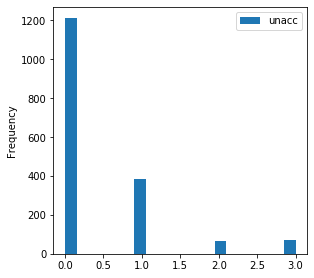

In [49]:
#visualize distribution of classes

plot_function(dataset)

# Data Splitting

In [64]:

#split the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size=0.33, random_state=42)


In [66]:
    
y_train=y_train.astype('int')
y_test=y_test.astype('int')




# Data Modelling and Results Evaluation

the 2nd and 3rd questions are answered:
2- How to train the model?
3- Decide whether to buy or not?

In [67]:
#import the SVM model so it can be used for training the data.



def training_model(X_train, y_train, X_test, y_test):
    
    """This function is used for training and testing the model, then the accuracy result of the model will be returned."""
    
    
    #create an instance of the model to be used.
    classifier_Test = svm.SVC()
    
    #fit the traing data into the model.
    classifier_Test.fit(X_train, y_train)
    
    #predict the testing data by useing the pre-trained model classifier_Test.
    y_pred = classifier_Test.predict(X_test)
    
    
    # Model Accuracy: how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    
    return accuracy
    
    
    

In [68]:


accuracy = training_model(X_train, y_train, X_test, y_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy )

Accuracy: 0.9105263157894737


/Users/mishz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
